# Lab 5: Numerical differentiation

In this lab we will investigate three methods of increasing sophistication to estimate the derivative of a mathematical function. We'll also investigate how to choose the parameters of these methods to get accurate results.

Remember to consult the cheat sheet on QM+ if you're uncertain about the maths involved.

## Coding the three methods

Recall that the simplest possible algorithm, the *forward difference method*, is very similar to the definition of differentiation:

$$
f'(x) = \lim_{x\rightarrow 0}\frac{f(x + h) - f(x)}{h}.
$$

We simply choose a small step $h$ and write

$$
f'(x, h)_\text{FD} = \frac{f(x + h) - f(x)}{h}.
$$

**Write a function `FD(f, x, h)` to return the derivative of some function `f` at `x` using a step size of `h`.**

In [1]:
def FD(f, x, h):
    """Using Forward difference returns an approximate derivative of function f at x using a step size of h"""
    # Your code goes here
    return (f(x+h)-f(x))/h

**Check your function** using the sine function (recall that you can `from numpy import sin`) at $x = 0$ and various step sizes.

In [2]:
from numpy import sin, linspace
% matplotlib inline
h=linspace(0.05,1,10)
FD(sin,0,h)
#Smaller h gives more accurate results (closest to 1)

array([ 0.99958339,  0.99597195,  0.9886755 ,  0.97774274,  0.96324655,
        0.94528346,  0.92397283,  0.89945592,  0.87189479,  0.84147098])

A more sophisticated algorithm is the *central difference* method, which as we have seen in class eliminates first-order error, so that the error is proportional to $h^2$ rather than $h$. Recall that this method sets

$$
f'(x, h)_\text{CD} = \frac{f(x + \tfrac12h) - f(x - \tfrac12h)}{h}.
$$

In [3]:
def CD(f,x,h):
    """"Using Central Differences, return the derivative of some function f at x using a step size of h"""
    
    return (f(x+h/2)-f(x-h/2))/h

The final method we discussed was the *extrapolated difference* method, in which we combine two iterations of the central difference algorithm to give error proportional to $h^4$:

$$
f'(x, h)_\text{ED} = \tfrac13\big(4f'(x, \tfrac12h)_\text{CD} - f'(x, h)_\text{CD}\big).
$$

**Once again, write a function `ED(f, x, h)` to use this method. It will be easiest to have your function call the `CD` function you've already written.**

In [4]:
def ED(f,x,h):
    return (4*CD(f,x,h/2)-CD(f,x,h))/3
ED(sin,0,h)
#More accurate 


array([ 1.        ,  0.99999992,  0.9999994 ,  0.99999765,  0.99999354,
        0.99998553,  0.99997171,  0.9999498 ,  0.99991715,  0.99987076])

In [5]:
def sincos(x):
    return sin(cos(x))
    
def sincosp(x):
    return -sin(x)*cos(cos(x))

▶ **CHECKPOINT 1**

## Testing the algorithms

Let's test these three algorithms using functions that are easy to differentiate by hand. Specifically, we'll differentiate the functions $\cos(x)$ and $e^x$ at $x = 0.1$, $1$ and $100$.

Initially, you should **pick one function and one point to test it at** from these lists. The following code outline, when complete, will calculate the derivative of a test function at some point using the FD method for a range of step sizes $h$. It will then calculate and print out the relative error $\epsilon$, where
$$
\epsilon = \frac{f'(x)_\text{calculated} - f'(x)_\text{exact}}{f'(x)_\text{exact}},
$$
and finally plot $|\epsilon|$ against $h$ on a log-log plot.

**Complete this code to perform as described.**

▶ **CHECKPOINT 2**

**Then modify it to include the CD and ED algorithms, all plotted on the one figure.**

<IPython.core.display.Javascript object>


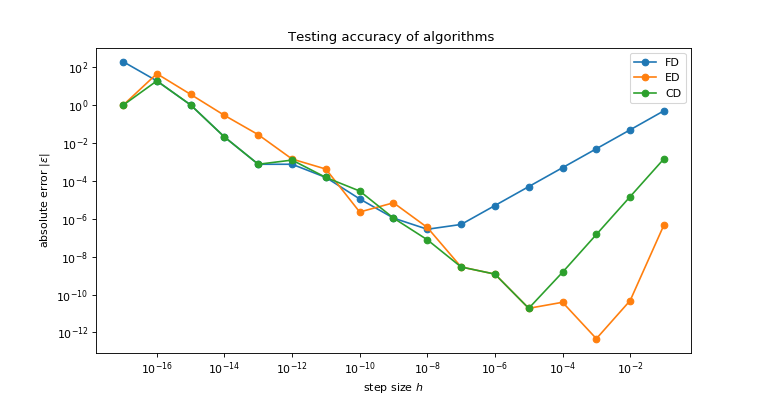

In [9]:
from pylab import cos, sin, exp, logspace, loglog, xlabel, ylabel, title, legend
%matplotlib notebook

test_f = sincos
x0 = 0.1       # evaluate this function at x0
fx0p = sincosp(x0)  # true value of the derivative of test_f at x0 

hh = logspace(-1, -17, 17)

fd_errors = []
cd_errors = []
ed_errors = []


for h in hh: # estimated derivative with the FD method here.

    fd_estimate =FD(test_f,x0,h) 
    cd_estimate =CD(test_f,x0,h)
    ed_estimate =ED(test_f,x0,h)
    
    fd_error =(fd_estimate - fx0p)/fx0p  # calculate epsilon for the FD method here.

    cd_error =(cd_estimate - fx0p)/fx0p
    ed_error =(ed_estimate - fx0p)/fx0p
    #print("{:5.0e} {:10.6f} {:10.6f}".format(h, fd_estimate, fd_error))
    

    fd_errors.append(abs(fd_error))
    ed_errors.append(abs(ed_error))
    cd_errors.append(abs(cd_error))

loglog(hh, fd_errors, 'o-', label="FD")
loglog(hh, ed_errors, 'o-', label="ED")
loglog(hh, cd_errors, 'o-', label="CD")

xlabel('step size $h$')
ylabel('absolute error $|\epsilon|$')
title('Testing accuracy of algorithms ') 
legend()

**Where is each algorithm most accurate? Can you identify which sorts of error occur elsewhere?**

▶ **CHECKPOINT 3**

## Extension: *Imaginary step* algorithm

The *imaginary step* algorithm is

$$
f'(x, h)_\text{IS} = \frac{\mathrm{Im}\{x + \mathrm{i}h\}}{h}
$$

where $\mathrm{Im}$ represents the imaginary part of a number; this only works if $f$ is a *real* function. This looks extraordinarily bizarre on the face of it, but can be shown to work using Taylor series in much the same way as we did in class for the other algorithms.

**Code a function `IS(f, x, h)` to calculate the derivative using this method. Is it more or less accurate than the other methods we have discussed? Can you see why?**

*Hint*: The number $2 + 3\mathrm{i}$ is written in Python as `2 + 3j`. If `z` is a complex number in Python, its imaginary part is `z.imag`. 

For more information about this algorithm, you might like to see [this informal blog post](https://sinews.siam.org/Details-Page/differentiation-without-a-difference) or a [more formal paper](http://mdolab.engin.umich.edu/sites/default/files/Martins2003CSD.pdf) (section 2.1 is most relevant for our purposes).

In [7]:
def IS(f,x,h):
    z=x+ h*1j
    return z.imag/h

In [8]:
IS(f,1,1-3)

NameError: name 'f' is not defined

In [ ]:
def f(x):
    return x**2 - 2

In [ ]:
min(cd_errors)

In [ ]:
min(fd_errors)

In [ ]:
fd_errors